In [16]:
# Imports
import pandas as pd
import time

import numpy as np
from numpy.lib.format import open_memmap

import matplotlib.pyplot as plt
%matplotlib inline

from pycbc.types.timeseries import TimeSeries
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform
from pycbc.filter import match, overlap

897992
897992
898060
898060
Projection time: 0.3483998775482178
Total time: 12.525278568267822


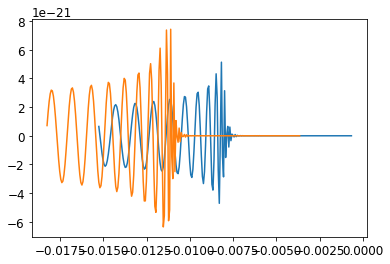

In [6]:
# Use PyCBC Detector.project_wave(hp, hc, ra, dec, polarization, method='lal')
start_time = time.time()

ra = 2.2
dec = 1.26
pol = 2.23

hp, hc = get_td_waveform(approximant='SEOBNRv4',
                        mass1=1.4,
                        mass2=1.4,
                        spin1z=0.1,
                        spin2z=0.3,
                        inclination=1.96,
                        coa_phase=6.27,
                        delta_t=1.0/16384,
                        f_lower=30)

print(len(hp.data))
print(len(hc.data))

project_start_time = time.time()

h1 = Detector('H1')
l1 = Detector('L1')

h1_strain_lal = h1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='lal')
l1_strain_lal = l1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='lal')

print(len(h1_strain_lal.data))
print(len(l1_strain_lal.data))

print(f"Projection time: {time.time() - project_start_time}")
print(f"Total time: {time.time() - start_time}")

plt.plot(l1_strain_lal.sample_times[897820:], l1_strain_lal[897820:])
plt.plot(h1_strain_lal.sample_times[897820:], h1_strain_lal[897820:])
plt.show()

897992
897992
897992
897992
Projection time: 0.5953257083892822
Total time: 27.719813585281372


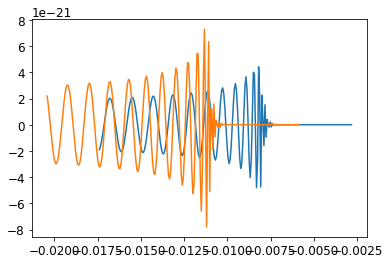

In [7]:
# Use PyCBC Detector.project_wave(hp, hc, ra, dec, polarization, method='constant')
start_time = time.time()

ra = 2.2
dec = 1.26
pol = 2.23

hp, hc = get_td_waveform(approximant='SEOBNRv4',
                        mass1=1.4,
                        mass2=1.4,
                        spin1z=0.1,
                        spin2z=0.3,
                        inclination=1.96,
                        coa_phase=6.27,
                        delta_t=1.0/16384,
                        f_lower=30)

print(len(hp.data))
print(len(hc.data))

project_start_time = time.time()

h1 = Detector('H1')
l1 = Detector('L1')

h1_strain_const = h1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='constant')
l1_strain_const = l1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='constant')

print(len(h1_strain_const.data))
print(len(l1_strain_const.data))

print(f"Projection time: {time.time() - project_start_time}")
print(f"Total time: {time.time() - start_time}")

plt.plot(l1_strain_const.sample_times[897752:], l1_strain_const[897752:])
plt.plot(h1_strain_const.sample_times[897752:], h1_strain_const[897752:])
plt.show()

897992
897992
897992
897992
Projection time: 0.3841664791107178
Total time: 26.82475781440735


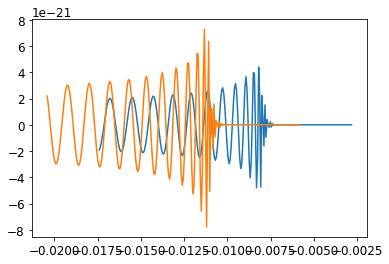

In [8]:
# Use PyCBC Detector.project_wave(hp, hc, ra, dec, polarization, method='vary_polarization')
start_time = time.time()

ra = 2.2
dec = 1.26
pol = 2.23

hp, hc = get_td_waveform(approximant='SEOBNRv4',
                        mass1=1.4,
                        mass2=1.4,
                        spin1z=0.1,
                        spin2z=0.3,
                        inclination=1.96,
                        coa_phase=6.27,
                        delta_t=1.0/16384,
                        f_lower=30)

print(len(hp.data))
print(len(hc.data))

project_start_time = time.time()

h1 = Detector('H1')
l1 = Detector('L1')

h1_strain_vary_pol = h1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='vary_polarization')
l1_strain_vary_pol = l1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='vary_polarization')

print(len(h1_strain_vary_pol.data))
print(len(l1_strain_vary_pol.data))

print(f"Projection time: {time.time() - project_start_time}")
print(f"Total time: {time.time() - start_time}")

plt.plot(l1_strain_vary_pol.sample_times[897752:], l1_strain_vary_pol[897752:])
plt.plot(h1_strain_vary_pol.sample_times[897752:], h1_strain_vary_pol[897752:])
plt.show()

Start time of const/vary: -54.814848755
Start time of lal: -54.816833496


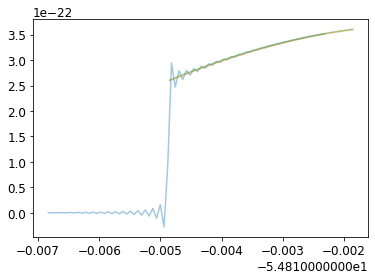

In [9]:
print(f"Start time of const/vary: {h1_strain_const.sample_times[0]}")
print(f"Start time of lal: {h1_strain_lal.sample_times[0]}")

plt.plot(h1_strain_lal.sample_times[:75], h1_strain_lal[:75], alpha=0.4)
plt.plot(h1_strain_const.sample_times[:50], h1_strain_const[:50], alpha=0.4)
plt.plot(h1_strain_vary_pol.sample_times[:50], h1_strain_vary_pol[:50], alpha=0.4)
plt.show()

Start time of const/vary: -54.811838518
Start time of lal: -54.813842773


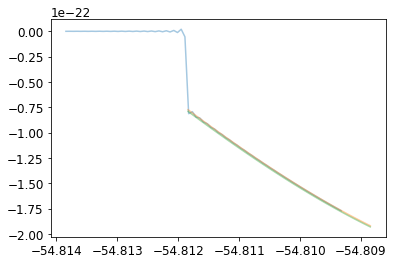

In [10]:
print(f"Start time of const/vary: {l1_strain_const.sample_times[0]}")
print(f"Start time of lal: {l1_strain_lal.sample_times[0]}")

plt.plot(l1_strain_lal.sample_times[:75], l1_strain_lal[:75], alpha=0.4)
plt.plot(l1_strain_const.sample_times[:50], l1_strain_const[:50], alpha=0.4)
plt.plot(l1_strain_vary_pol.sample_times[:50], l1_strain_vary_pol[:50], alpha=0.4)
plt.show()

End time of const/vary: -0.005827758906249869
End time of lal: -0.0036621092812509914


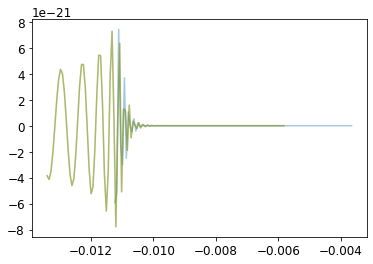

In [11]:
print(f"End time of const/vary: {h1_strain_const.sample_times[-1]}")
print(f"End time of lal: {h1_strain_lal.sample_times[-1]}")

plt.plot(h1_strain_lal.sample_times[-125:], h1_strain_lal.data[-125:], alpha=0.4)
plt.plot(h1_strain_const.sample_times[-125:], h1_strain_const.data[-125:], alpha=0.4)
plt.plot(h1_strain_vary_pol.sample_times[-125:], h1_strain_vary_pol.data[-125:], alpha=0.4)
plt.show()

End time of const/vary: -0.005827758906249869
End time of lal: -0.0036621092812509914


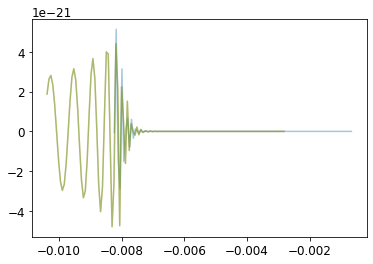

In [12]:
print(f"End time of const/vary: {h1_strain_const.sample_times[-1]}")
print(f"End time of lal: {h1_strain_lal.sample_times[-1]}")

plt.plot(l1_strain_lal.sample_times[-125:], l1_strain_lal.data[-125:], alpha=0.4)
plt.plot(l1_strain_const.sample_times[-125:], l1_strain_const.data[-125:], alpha=0.4)
plt.plot(l1_strain_vary_pol.sample_times[-125:], l1_strain_vary_pol.data[-125:], alpha=0.4)
plt.show()

In [13]:
# Slice the lal result to original length due to edge effects
h1_strain_lal_sliced = h1_strain_lal.time_slice(start=h1_strain_const.sample_times[0], end=h1_strain_const.sample_times[-1])
l1_strain_lal_sliced = l1_strain_lal.time_slice(start=l1_strain_const.sample_times[0], end=l1_strain_const.sample_times[-1])

print(len(h1_strain_lal))
print(len(h1_strain_lal_sliced))
print(len(h1_strain_const))
print(len(h1_strain_vary_pol))

print(len(l1_strain_lal))
print(len(l1_strain_lal_sliced))
print(len(l1_strain_const))
print(len(l1_strain_vary_pol))

898060
897992
897992
897992
898060
897992
897992
897992


In [17]:
# Overlaps between all projected waveforms (H1)

h1_overlap_lal_const = min(
    [overlap(h1_strain_lal_sliced, h1_strain_const, psd=None, low_frequency_cutoff=30),
    overlap(h1_strain_const, h1_strain_lal_sliced, psd=None, low_frequency_cutoff=30)]
)

h1_overlap_lal_vary_pol = min(
    [overlap(h1_strain_lal_sliced, h1_strain_vary_pol, psd=None, low_frequency_cutoff=30),
    overlap(h1_strain_vary_pol, h1_strain_lal_sliced, psd=None, low_frequency_cutoff=30)]
)

h1_overlap_const_vary_pol = min(
    [overlap(h1_strain_const, h1_strain_vary_pol, psd=None, low_frequency_cutoff=30),
    overlap(h1_strain_vary_pol, h1_strain_const, psd=None, low_frequency_cutoff=30)]
)

print("Minimum Overlap H1 lal-const %s" % h1_overlap_lal_const)
print("Minimum Overlap H1 lal-vary pol %s" % h1_overlap_lal_vary_pol)
print("Minimum Overlap H1 const-vary pol %s" % h1_overlap_const_vary_pol)

Minimum Overlap H1 lal-const 0.9991563496983074
Minimum Overlap H1 lal-vary pol 0.9992185452451379
Minimum Overlap H1 const-vary pol 0.9999939006109797


In [18]:
# Overlaps between all projected waveforms (L1)

l1_overlap_lal_const = min(
    [overlap(l1_strain_lal_sliced, l1_strain_const, psd=None, low_frequency_cutoff=30),
    overlap(l1_strain_const, l1_strain_lal_sliced, psd=None, low_frequency_cutoff=30)]
)

l1_overlap_lal_vary_pol = min(
    [overlap(l1_strain_lal_sliced, l1_strain_vary_pol, psd=None, low_frequency_cutoff=30),
    overlap(l1_strain_vary_pol, l1_strain_lal_sliced, psd=None, low_frequency_cutoff=30)]
)

l1_overlap_const_vary_pol = min(
    [overlap(l1_strain_const, l1_strain_vary_pol, psd=None, low_frequency_cutoff=30),
    overlap(l1_strain_vary_pol, l1_strain_const, psd=None, low_frequency_cutoff=30)]
)

print("Minimum Overlap L1 lal-const %s" % l1_overlap_lal_const)
print("Minimum Overlap L1 lal-vary pol %s" % l1_overlap_lal_vary_pol)
print("Minimum Overlap L1 const-vary pol %s" % l1_overlap_const_vary_pol)

Minimum Overlap L1 lal-const 0.9980434403487575
Minimum Overlap L1 lal-vary pol 0.9981730484129192
Minimum Overlap L1 const-vary pol 0.999989159922843


In [ ]:
# Conclusion is to use the 'vary-pol' method 